In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu
from skimage import io, exposure
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle
import os
from os import listdir
from pathlib import Path

TRAINING

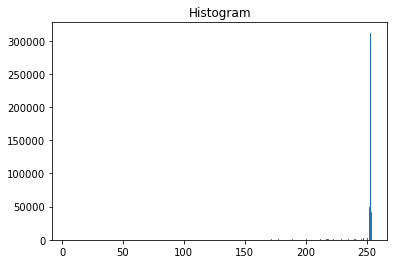

83


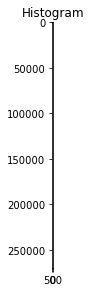

90


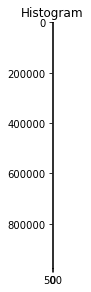

114


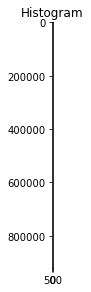

96


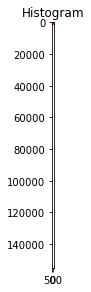

109


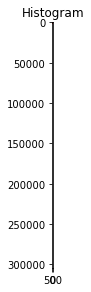

82


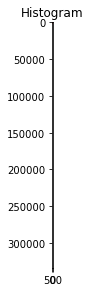

81


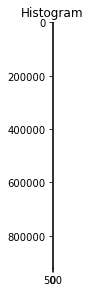

103


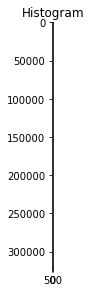

81


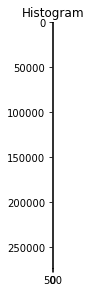

87


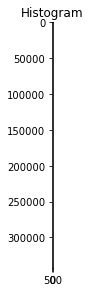

83


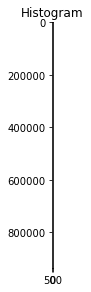

95


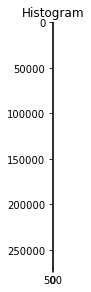

86


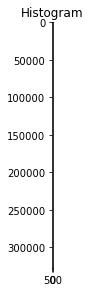

85


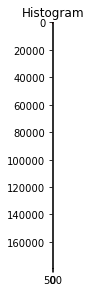

116


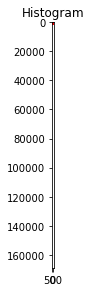

122
[65, 134, 215, 293, 373, 446, 522, 600, 665, 731, 807, 867, 922, 995, 1076, 1159]


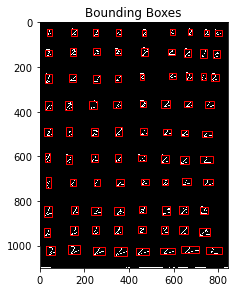

In [2]:
folder_directory = '/Users/sanchitthakur/training_images'          #directory containing images

Features = []
char_ranges=[]
images = Path(folder_directory).glob('*.bmp')
for image in images:
    img=io.imread(image)
    hist = exposure.histogram(img)
    plt.bar(hist[1], hist[0])
    plt.title('Histogram')
    plt.show()
    th = 200
    img_binary = (img < th).astype(np.double)
    img_label = label(img_binary, background=0)
    print(np.amax(img_label))
    regions = regionprops(img_label)
    io.imshow(img_binary)
    ax = plt.gca()
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        if ((maxc-minc)<18 or (maxr-minr)<18):                 #setting threshold for bounding boxes
            continue
        ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = False, edgecolor = 'red', linewidth = 1))
        roi = img_binary[minr:maxr, minc:maxc]
        m = moments(roi)
        cr = m[0, 1] / m[0, 0]
        cc = m[1, 0] / m[0, 0]
        center = (cr, cc)
        mu = moments_central(roi, center)
        nu = moments_normalized(mu)
        hu = moments_hu(nu)
        Features.append(hu)
    char_ranges.append(len(Features))
    ax.set_title('Bounding Boxes')
print(char_ranges)
io.show()

In [3]:
print(len(Features))
print(Features)

1159
[array([ 4.19781444e-01,  3.34312047e-03,  7.77133313e-03,  6.57288450e-04,
        2.31678734e-07, -3.79573946e-05, -1.46735401e-06]), array([ 6.01797836e-01,  2.71854852e-02,  6.52303270e-02,  4.56815900e-03,
       -5.74477635e-06,  3.21301838e-04, -7.86468011e-05]), array([ 5.25447113e-01,  2.34016383e-02,  4.95926512e-02,  6.49411569e-03,
       -1.54042128e-06,  6.64395707e-04, -1.16533491e-04]), array([ 4.45519984e-01,  9.61300674e-03,  1.59416217e-02,  1.63948182e-03,
       -1.73910076e-07,  6.74964178e-05, -8.37978064e-06]), array([ 4.23848858e-01,  7.23733290e-03,  1.67607430e-02,  4.55127240e-03,
       -2.07098781e-05, -3.13635682e-04, -3.39297373e-05]), array([ 5.22063820e-01,  8.57068778e-03,  1.24625007e-02,  6.80725070e-03,
       -6.11769890e-05,  1.27405685e-04, -1.37307467e-05]), array([ 4.63296703e-01,  9.54162245e-03,  1.42696703e-02,  8.46275098e-03,
       -8.16706087e-05, -3.32480048e-04, -4.44810933e-05]), array([ 4.73359378e-01,  4.38706903e-03,  1.50218

In [4]:
characters =['a','d','f','h','k','m','n','o','p','q','r','s','u','w','x','z']

In [5]:
flat_features = np.array(Features)
flat_features=flat_features.flatten()
print(flat_features)
print(len(flat_features))

average=np.average(flat_features)
std_deviation=np.std(flat_features)
print(average)
print(std_deviation)

[ 0.41978144  0.00334312  0.00777133 ... -0.19399296  0.55694646
 -1.83588638]
8113
73726910.48480421
6668620926.293209


In [6]:
for i in range(len(flat_features)):
    flat_features[i] = (flat_features[i] - average)
    flat_features[i] = flat_features[i] / std_deviation

print(flat_features)

[-0.0110558 -0.0110558 -0.0110558 ... -0.0110558 -0.0110558 -0.0110558]


In [7]:
new_average = np.average(flat_features)
new_std_deviation = np.std(flat_features)
print(new_average)
print(new_std_deviation)

-2.6274229104897087e-18
1.0


In [ ]:
D = cdist(Features, Features)

In [9]:
D

array([[ 0.        ,  0.19239384,  0.11554729, ...,  1.15500942,
        36.95903684,  2.78715464],
       [ 0.19239384,  0.        ,  0.07805201, ...,  1.05049527,
        36.94721035,  2.72555292],
       [ 0.11554729,  0.07805201,  0.        , ...,  1.08687799,
        36.95051384,  2.74546496],
       ...,
       [ 1.15500942,  1.05049527,  1.08687799, ...,  0.        ,
        36.51402916,  1.89202274],
       [36.95903684, 36.94721035, 36.95051384, ..., 36.51402916,
         0.        , 34.78710619],
       [ 2.78715464,  2.72555292,  2.74546496, ...,  1.89202274,
        34.78710619,  0.        ]])

In [10]:
D_index = np.argsort(D, axis=1)

print(D_index.shape)

print(D_index)

(1159, 1159)
[[   0  467    4 ...  575  190 1067]
 [   1 1130 1090 ...  575  190 1067]
 [   2   17   16 ...  575  190 1067]
 ...
 [1156 1154  311 ...  575  190 1067]
 [1157  304  370 ...  575  190 1067]
 [1158  371 1118 ...  575  190 1067]]


In [11]:
true_index=[]
predict_index=[]
for i in range(D_index.shape[0]):
    true_index.append(D_index[i,0])
    predict_index.append(D_index[i,1])

In [12]:
y_true=[]
# for calculating true labels
for i in true_index:
    k=0
    for j in char_ranges:
        if i >= j:
            k+=1
            continue
        y_true.append(characters[k])
        break
print(y_true)

y_pred=[]
#for calculating predicted labels
for i in predict_index:
    k=0
    for j in char_ranges:
        if i >= j:
            k+=1
            continue
        y_pred.append(characters[k])
        break
print(y_pred)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',

In [13]:
confusion_matrix(y_true,y_pred)

array([[24,  0,  0,  0,  0,  8, 15,  0,  2,  3,  0,  0,  9,  2,  1,  1],
       [ 1, 51,  1,  0,  1,  3,  1,  1,  1,  2,  3,  0,  1,  2,  1,  0],
       [ 0,  3, 40, 24,  3,  0,  0,  1,  0,  0,  0,  8,  0,  0,  1,  1],
       [ 0,  0, 25, 40, 11,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  4, 13, 60,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 4,  3,  0,  0,  1, 44,  6,  0,  3,  3,  0,  0,  5,  4,  0,  0],
       [14,  2,  0,  0,  0,  6, 34,  0,  2,  3,  0,  0, 11,  1,  2,  1],
       [ 0,  2,  2,  0,  1,  0,  0, 47,  2,  1,  0,  8,  0,  0, 11,  4],
       [ 2,  2,  0,  0,  0,  4,  2,  2, 36,  6,  9,  0,  0,  2,  0,  0],
       [ 4,  0,  0,  0,  0,  3,  3,  1,  8, 23,  6,  0,  2, 13,  0,  3],
       [ 1,  4,  0,  0,  0,  0,  1,  0, 12,  3, 48,  0,  0,  6,  0,  1],
       [ 0,  1, 10,  6,  0,  0,  0,  6,  0,  0,  0, 32,  0,  0,  1,  4],
       [10,  1,  0,  0,  0,  7,  5,  0,  2,  3,  0,  0, 20,  5,  1,  1],
       [ 1,  0,  0,  0,  1, 10,  2,  0,  4,  5, 10,

In [14]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred))

0.5383951682484901


FOR TEST IMAGE 1

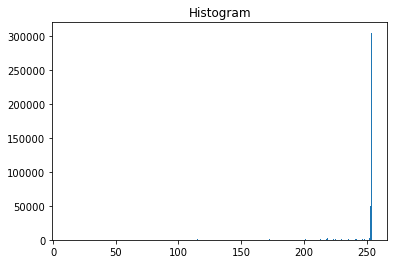

80
67


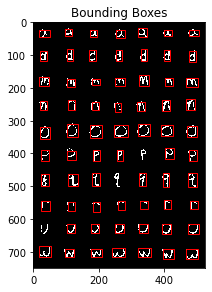

[67]


In [15]:
folder_directory = '/Users/sanchitthakur/test_images'
Features_new = []
char_ranges_test = []
imgs = Path(folder_directory).glob('test1.bmp')
for img in imgs:
    im=io.imread(img)
    hist = exposure.histogram(im)
    plt.bar(hist[1], hist[0])
    plt.title('Histogram')
    plt.show()
    th = 200
    img_binary = (im < th).astype(np.double)
    img_label = label(img_binary, background=0)
    print(np.amax(img_label))
    regions = regionprops(img_label)
    io.imshow(img_binary)
    ax = plt.gca()
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        if ((maxc-minc)<18 or (maxr-minr)<18):
            continue
        ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = False, edgecolor = 'red', linewidth = 1))
        roi = img_binary[minr:maxr, minc:maxc]
        m = moments(roi)
        cr = m[0, 1] / m[0, 0]
        cc = m[1, 0] / m[0, 0]
        center = (cr, cc)
        mu = moments_central(roi, center)
        nu = moments_normalized(mu)
        hu = moments_hu(nu)
        Features_new.append(hu)
    char_ranges_test.append(len(Features_new))
    print(len(Features_new))
    ax.set_title('Bounding Boxes')
    io.show()
print(char_ranges_test)

In [16]:
print(Features_new)

[array([ 4.47171355e-01,  1.81517750e-02,  1.74287123e-02,  6.17502657e-03,
       -2.87347551e-05, -8.22438167e-04, -5.72544524e-05]), array([ 3.46952942e-01,  1.04345028e-03,  1.65352878e-03,  1.94516657e-03,
        5.08000274e-07, -6.25190922e-05,  3.45133300e-06]), array([ 4.84009484e-01,  9.54077459e-03,  4.78193128e-03,  5.61698432e-03,
       -2.91077650e-05, -1.39584246e-04,  4.31086648e-07]), array([ 4.44772368e-01,  3.92287583e-03,  2.18367628e-02,  4.75358741e-03,
        8.22281167e-08, -2.97730749e-04, -4.84312557e-05]), array([ 0.49584192,  0.02045141,  0.02461389,  0.03490476, -0.00055938,
        0.00227333, -0.00085663]), array([ 3.28341159e-01,  2.30593196e-03,  4.01592304e-03,  4.69602736e-04,
       -4.49152775e-07, -1.78783684e-05,  4.62764081e-07]), array([ 3.53520233e-01,  1.14101872e-02,  8.39848008e-03,  1.32681468e-04,
        1.08222072e-07,  1.32434774e-05, -8.89096944e-08]), array([1.33764991, 1.16078275, 1.62767172, 3.04610307, 6.77266833,
       3.281766

In [17]:
print(len(Features_new))

67


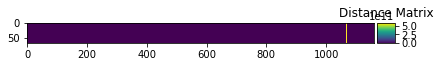

In [18]:
D_new = cdist(Features_new,Features)
io.imshow(D_new)
plt.title('Distance Matrix')
io.show()

In [19]:
print(D_new)

[[3.30731494e-02 1.62110586e-01 8.48026598e-02 ... 1.13367871e+00
  3.69559143e+01 2.77355247e+00]
 [7.31325238e-02 2.63966607e-01 1.86224201e-01 ... 1.19708705e+00
  3.69623183e+01 2.80908640e+00]
 [6.47857881e-02 1.33569305e-01 6.25989730e-02 ... 1.11756467e+00
  3.69552358e+01 2.76725771e+00]
 ...
 [5.54106178e-01 4.54303654e-01 4.81615936e-01 ... 7.23285568e-01
  3.67430023e+01 2.38647736e+00]
 [5.03274639e-02 1.76446738e-01 9.97325192e-02 ... 1.12473640e+00
  3.69499262e+01 2.76072385e+00]
 [3.05356585e-01 1.38859301e-01 1.96280474e-01 ... 9.47387340e-01
  3.69155931e+01 2.64223368e+00]]


In [20]:
D_index_new = np.argsort(D_new, axis=1)

In [21]:
print(D_index_new.shape)

print(D_index_new)

(67, 1159)
[[   3  917   15 ...  575  190 1067]
 [ 472   88   27 ...  575  190 1067]
 [ 462  882  918 ...  575  190 1067]
 ...
 [ 968  943  731 ...  575  190 1067]
 [ 710  679  672 ...  575  190 1067]
 [1095 1148  884 ...  575  190 1067]]


In [22]:
predict_index_new=[]
for i in range(D_index_new.shape[0]):
    predict_index_new.append(D_index_new[i,0])
#print(y_true_index)
print(predict_index_new)

[3, 472, 462, 3, 464, 11, 35, 115, 127, 95, 74, 67, 103, 132, 10, 910, 385, 439, 377, 62, 409, 26, 51, 482, 13, 462, 62, 50, 1066, 1028, 1028, 1036, 1065, 463, 586, 511, 676, 676, 745, 746, 67, 1079, 610, 708, 1062, 978, 656, 662, 705, 966, 524, 731, 637, 749, 52, 1063, 1022, 52, 463, 463, 1010, 1085, 883, 15, 968, 710, 1095]


In [23]:
y_pred_new=[]
for i in predict_index_new:
    k=0
    for j in char_ranges:
        if i >= j:
            k+=1
            continue
        y_pred_new.append(characters[k])
        break
print(y_pred_new)

['a', 'n', 'n', 'a', 'n', 'a', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'a', 'u', 'm', 'm', 'm', 'a', 'm', 'a', 'a', 'n', 'a', 'n', 'a', 'a', 'x', 'x', 'x', 'x', 'x', 'n', 'o', 'n', 'q', 'q', 'r', 'r', 'd', 'z', 'p', 'q', 'x', 'w', 'p', 'p', 'q', 'w', 'o', 'r', 'p', 'r', 'a', 'x', 'x', 'a', 'n', 'n', 'x', 'z', 'u', 'a', 'w', 'q', 'z']


In [24]:
with open('/Users/sanchitthakur/pickle_files/test1_gt.pkl', 'rb') as file:
    my_dict = pickle.load(file)
classes = my_dict['classes']
locations = my_dict['locations']

print(classes)

print(locations)

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'm' 'm' 'm' 'm'
 'm' 'm' 'm' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'p'
 'p' 'p' 'p' 'p' 'p' 'p' 'q' 'q' 'q' 'q' 'q' 'q' 'q' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'u' 'u' 'u' 'u' 'u' 'u' 'u' 'w' 'w' 'w' 'w' 'w' 'w' 'w']
[[ 30  32]
 [108  30]
 [187  34]
 [262  36]
 [333  34]
 [485  32]
 [408  31]
 [ 26 108]
 [111 107]
 [185 107]
 [263 110]
 [338 111]
 [410 107]
 [486 110]
 [ 35 179]
 [117 185]
 [187 185]
 [261 181]
 [336 182]
 [413 182]
 [483 184]
 [ 34 255]
 [116 254]
 [186 259]
 [258 255]
 [330 259]
 [406 256]
 [484 250]
 [ 34 341]
 [118 331]
 [196 335]
 [272 335]
 [337 328]
 [411 331]
 [483 331]
 [ 33 402]
 [115 405]
 [194 399]
 [266 400]
 [340 397]
 [415 401]
 [488 404]
 [ 32 479]
 [116 475]
 [188 474]
 [257 473]
 [334 475]
 [408 476]
 [485 477]
 [ 32 561]
 [117 563]
 [195 561]
 [268 562]
 [336 559]
 [407 558]
 [487 553]
 [ 33 630]
 [114 628]
 [190 628]
 [268 632]
 [335 630]
 [407 632]
 [496 629]
 [ 37 703]
 [109 707]


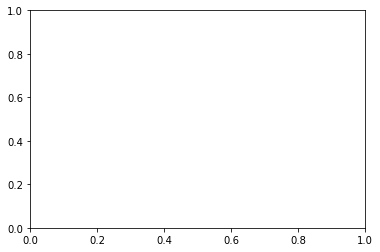

In [25]:
folder_directory = '/Users/sanchitthakur/test_images'
y_true_new=[]
imgs = Path(folder_directory).glob('test1.bmp')
for img in imgs:
    im=io.imread(img)
    th = 200
    img_binary = (im < th).astype(np.double)
    img_label = label(img_binary, background=0)
    regions = regionprops(img_label)
    ax = plt.gca()
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        if ((maxc-minc)<18 or (maxr-minr)<18):
            continue
        ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = False, edgecolor = 'red', linewidth = 1))
        for i in range(len(locations)):
            if locations[i][0] > minc and locations[i][0] < maxc and locations[i][1] > minr and locations[i][1] < maxr:
                y_true_new.append(classes[i])
    

In [26]:
print(y_true_new)

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'p', 'p', 'p', 'p', 'p', 'p', 'q', 'q', 'q', 'q', 'q', 'q', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'u', 'u', 'u', 'u', 'u', 'u', 'w', 'w', 'w', 'w', 'w', 'w', 'w']


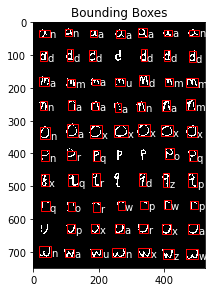

In [27]:
regions = regionprops(img_label)
io.imshow(img_binary)
ax = plt.gca()
bound_count = 0
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    if ((maxc-minc) < 19 or (maxr-minr) < 19):
      continue
    ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = 
False, edgecolor = 'red', linewidth = 1))
    ax.text(maxc, maxr, y_pred_new[bound_count], color="white")
    bound_count += 1
ax.set_title('Bounding Boxes')
io.show()

In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true_new, y_pred_new))

0.3283582089552239


FOR TEST IMAGE 2

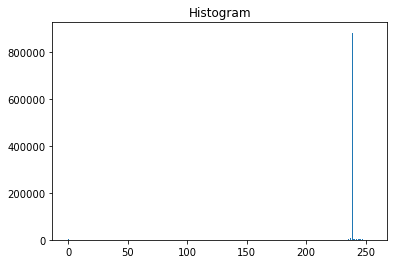

112
73


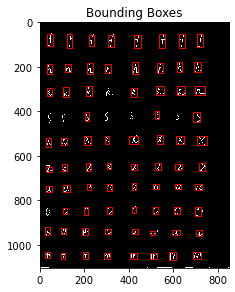

[73]


In [29]:
folder_directory = '/Users/sanchitthakur/test_images'
Features_last = []
char_ranges_test = []
imgs = Path(folder_directory).glob('test2.bmp')
for img in imgs:
    im=io.imread(img)
    hist = exposure.histogram(im)
    plt.bar(hist[1], hist[0])
    plt.title('Histogram')
    plt.show()
    th = 200
    img_binary = (im < th).astype(np.double)
    img_label = label(img_binary, background=0)
    print(np.amax(img_label))
    regions = regionprops(img_label)
    io.imshow(img_binary)
    ax = plt.gca()
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        if ((maxc-minc)<18 or (maxr-minr)<18):
            continue
        ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = False, edgecolor = 'red', linewidth = 1))
        roi = img_binary[minr:maxr, minc:maxc]
        m = moments(roi)
        cr = m[0, 1] / m[0, 0]
        cc = m[1, 0] / m[0, 0]
        center = (cr, cc)
        mu = moments_central(roi, center)
        nu = moments_normalized(mu)
        hu = moments_hu(nu)
        Features_last.append(hu)
    char_ranges_test.append(len(Features_last))
    print(len(Features_last))
    ax.set_title('Bounding Boxes')
    io.show()
print(char_ranges_test)

In [30]:
print(len(Features_last))

print(Features_last)

73
[array([3.65672859e+00, 8.15093998e+00, 4.95701500e+01, 6.98825102e+01,
       4.04161452e+03, 1.99329833e+02, 7.63180513e+02]), array([4.80152898e+00, 1.58669537e+01, 1.16769303e+02, 1.61132320e+02,
       2.19440246e+04, 6.39413980e+02, 2.64072012e+03]), array([4.02815136e+00, 1.11689783e+01, 7.65364182e+01, 1.01183475e+02,
       8.83896923e+03, 3.37653680e+02, 1.07642753e+03]), array([4.65175042e+00, 1.62405188e+01, 1.17137025e+02, 1.48244447e+02,
       1.94704975e+04, 5.96444079e+02, 1.58691019e+03]), array([4.25942017e+00, 1.28764698e+01, 9.18421661e+01, 1.18280918e+02,
       1.22600277e+04, 4.23595420e+02, 1.29291524e+03]), array([   3.0142838 ,    6.00912577,   28.21044245,   38.37851938,
       1252.5327477 ,   94.06956162,  160.76498587]), array([  2.78570064,   5.05059084,  24.23370169,  33.223894  ,
       934.61445165,  74.66067027, 123.40553503]), array([  2.65073466,   4.70826326,  25.30040509,  33.1351733 ,
       951.81701383,  71.87221299, 120.34865978]), array([

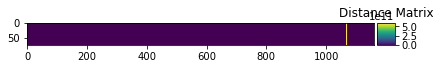

In [31]:
D_last = cdist(Features_last,Features)

io.imshow(D_last)
plt.title('Distance Matrix')
io.show()

In [32]:
print(D_last)

[[4.11876700e+03 4.11876606e+03 4.11876626e+03 ... 4.11903700e+03
  4.11542617e+03 4.11923347e+03]
 [2.21124927e+04 2.21124924e+04 2.21124924e+04 ... 2.21127614e+04
  2.21069215e+04 2.21128723e+04]
 [8.91158323e+03 8.91158259e+03 8.91158273e+03 ... 8.91184605e+03
  8.90600170e+03 8.91195104e+03]
 ...
 [2.08947017e-02 1.79287517e-01 1.03081015e-01 ... 1.14184505e+00
  3.69565098e+01 2.77904129e+00]
 [1.23486827e-01 8.23747334e-02 4.27632585e-02 ... 1.08271287e+00
  3.69505044e+01 2.74704230e+00]
 [2.51767035e-02 1.85883579e-01 1.09812886e-01 ... 1.13358120e+00
  3.69532843e+01 2.77025742e+00]]


In [33]:
D_index_last = np.argsort(D_last, axis=1)

In [34]:
print(D_index_last.shape)

print(D_index_last)

(73, 1159)
[[ 185  231  240 ...  575  190 1067]
 [ 143  194  865 ...  575  190 1067]
 [ 144  273  140 ...  575  190 1067]
 ...
 [ 919  917  915 ...  575  190 1067]
 [ 468  460  876 ...  575  190 1067]
 [  33  509    4 ...  575  190 1067]]


In [35]:
predict_index_last=[]
for i in range(D_index_last.shape[0]):
    predict_index_last.append(D_index_last[i,0])
#print(y_true_index)
print(predict_index_last)

[185, 143, 144, 194, 233, 264, 349, 349, 365, 255, 349, 295, 252, 229, 150, 226, 367, 228, 336, 344, 135, 299, 111, 268, 816, 157, 566, 1033, 565, 1072, 1100, 573, 234, 1000, 1124, 838, 1024, 597, 1128, 670, 197, 1138, 76, 451, 908, 455, 50, 1063, 1006, 45, 533, 599, 585, 593, 847, 545, 729, 908, 52, 45, 881, 1011, 941, 518, 1137, 45, 466, 51, 463, 1092, 919, 468, 33]


In [36]:
y_pred_last=[]
for i in predict_index_last:
    k=0
    for j in char_ranges:
        if i >= j:
            k+=1
            continue
        y_pred_last.append(characters[k])
        break
print(y_pred_last)

['f', 'f', 'f', 'f', 'h', 'h', 'k', 'k', 'k', 'h', 'k', 'k', 'h', 'h', 'f', 'h', 'k', 'h', 'k', 'k', 'f', 'k', 'd', 'h', 's', 'f', 'o', 'x', 'o', 'x', 'z', 'o', 'h', 'x', 'z', 's', 'x', 'o', 'z', 'q', 'f', 'z', 'd', 'n', 'u', 'n', 'a', 'x', 'x', 'a', 'o', 'o', 'o', 'o', 's', 'o', 'q', 'u', 'a', 'a', 'u', 'x', 'w', 'n', 'z', 'a', 'n', 'a', 'n', 'z', 'u', 'n', 'a']


In [37]:
with open('/Users/sanchitthakur/pickle_files/test2_gt.pkl', 'rb') as file:
    my_dict = pickle.load(file)
classes = my_dict['classes']
locations = my_dict['locations']

print(classes)

print(locations)

['w' 'm' 'z' 'o' 'x' 'a' 'k' 'f' 'h' 's' 's' 'x' 'w' 'm' 'z' 'k' 'o' 'a'
 'h' 'f' 'w' 'm' 'o' 'x' 's' 'k' 'z' 'a' 'h' 'f' 'm' 's' 'w' 'x' 'h' 'k'
 'z' 'a' 'o' 'f' 'x' 's' 'm' 'k' 'z' 'a' 'o' 'w' 'h' 'f' 'w' 'm' 'o' 'a'
 'z' 's' 'k' 'h' 'x' 'f' 'm' 'w' 'o' 's' 'z' 'a' 'x' 'h' 'k' 'f' 's' 'm'
 'h' 'o' 'k' 'a' 'w' 'f' 'x' 'z']
[[  36.   938.5]
 [  35.  1046.5]
 [  41.   662. ]
 [  36.   853. ]
 [  40.5  540.5]
 [  42.5  749.5]
 [  44.5  313.5]
 [  46.    79.5]
 [  45.   210.5]
 [  42.5  432. ]
 [ 101.   433.5]
 [ 108.5  537. ]
 [ 106.   939. ]
 [ 105.5 1052. ]
 [ 111.   655. ]
 [ 118.5  315. ]
 [ 114.5  848.5]
 [ 120.5  747.5]
 [ 129.   206.5]
 [ 135.    83. ]
 [ 204.   939. ]
 [ 206.  1048. ]
 [ 208.   850. ]
 [ 215.5  530.5]
 [ 211.   425. ]
 [ 221.5  310.5]
 [ 221.   651. ]
 [ 221.   741. ]
 [ 225.5  207.5]
 [ 232.5   80.5]
 [ 301.5 1050. ]
 [ 297.5  426. ]
 [ 306.   940.5]
 [ 302.   530.5]
 [ 308.5  208.5]
 [ 310.5  313.5]
 [ 310.5  647.5]
 [ 312.   742. ]
 [ 313.5  846. ]
 [ 320.    

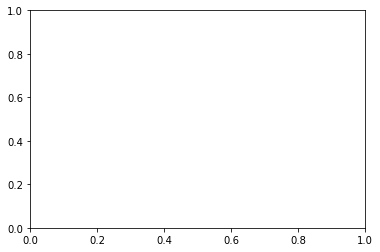

In [38]:
folder_directory = '/Users/sanchitthakur/test_images'
y_true_last=[]
imgs = Path(folder_directory).glob('test2.bmp')
for img in imgs:
    im=io.imread(img)
    th = 200
    img_binary = (im < th).astype(np.double)
    img_label = label(img_binary, background=0)
    regions = regionprops(img_label)
    ax = plt.gca()
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        if ((maxc-minc)<18 or (maxr-minr)<18):
            continue
        ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = False, edgecolor = 'red', linewidth = 1))
        for i in range(len(locations)):
            if locations[i][0] > minc and locations[i][0] < maxc and locations[i][1] > minr and locations[i][1] < maxr:
                y_true_last.append(classes[i])
            
    

In [39]:
print(y_true_last)

['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 's', 's', 's', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm']


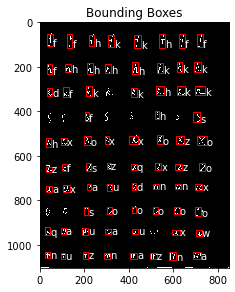

In [40]:
regions = regionprops(img_label)
io.imshow(img_binary)
ax = plt.gca()
bound_count = 0
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    if ((maxc-minc) < 19 or (maxr-minr) < 19):
      continue
    ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = 
False, edgecolor = 'red', linewidth = 1))
    ax.text(maxc, maxr, y_pred_last[bound_count], color="white")
    bound_count += 1
ax.set_title('Bounding Boxes')
io.show()

In [41]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true_last, y_pred_last))

0.3698630136986301


ENHANCEMENTS USING K NEAREST NEIGHBORS

FOR TRAINING DATA

In [42]:
training_dataframe = pd.DataFrame(Features, columns = ['Hu-1', 'Hu-2', 'Hu-3', 'Hu-4', 'Hu-5', 'Hu-6', 'Hu-7'])
print(training_dataframe)

          Hu-1      Hu-2      Hu-3       Hu-4          Hu-5      Hu-6  \
0     0.419781  0.003343  0.007771   0.000657  2.316787e-07 -0.000038   
1     0.601798  0.027185  0.065230   0.004568 -5.744776e-06  0.000321   
2     0.525447  0.023402  0.049593   0.006494 -1.540421e-06  0.000664   
3     0.445520  0.009613  0.015942   0.001639 -1.739101e-07  0.000067   
4     0.423849  0.007237  0.016761   0.004551 -2.070988e-05 -0.000314   
...        ...       ...       ...        ...           ...       ...   
1154  1.062887  0.026557  0.407546   0.784883 -2.905597e-01  0.121548   
1155  2.378466  0.393376  6.468446  11.908190 -1.145468e+01  6.770693   
1156  1.056021  0.060424  0.238214   0.833582 -2.511888e-01  0.202795   
1157  2.013307  0.692937  1.925795   8.620815  9.433453e+00  7.151232   
1158  1.198955  0.109835  0.648259   1.738822 -1.939930e-01  0.556946   

            Hu-7  
0      -0.000001  
1      -0.000079  
2      -0.000117  
3      -0.000008  
4      -0.000034  
...      

In [43]:
training_output = pd.DataFrame(y_pred, columns = ['Output'])
print(training_output)

     Output
0         n
1         z
2         a
3         u
4         a
...     ...
1154      z
1155      z
1156      z
1157      k
1158      k

[1159 rows x 1 columns]


In [44]:
training_dataframe['Output'] = y_pred
print(training_dataframe)

          Hu-1      Hu-2      Hu-3       Hu-4          Hu-5      Hu-6  \
0     0.419781  0.003343  0.007771   0.000657  2.316787e-07 -0.000038   
1     0.601798  0.027185  0.065230   0.004568 -5.744776e-06  0.000321   
2     0.525447  0.023402  0.049593   0.006494 -1.540421e-06  0.000664   
3     0.445520  0.009613  0.015942   0.001639 -1.739101e-07  0.000067   
4     0.423849  0.007237  0.016761   0.004551 -2.070988e-05 -0.000314   
...        ...       ...       ...        ...           ...       ...   
1154  1.062887  0.026557  0.407546   0.784883 -2.905597e-01  0.121548   
1155  2.378466  0.393376  6.468446  11.908190 -1.145468e+01  6.770693   
1156  1.056021  0.060424  0.238214   0.833582 -2.511888e-01  0.202795   
1157  2.013307  0.692937  1.925795   8.620815  9.433453e+00  7.151232   
1158  1.198955  0.109835  0.648259   1.738822 -1.939930e-01  0.556946   

            Hu-7 Output  
0      -0.000001      n  
1      -0.000079      z  
2      -0.000117      a  
3      -0.000008   

In [45]:
X = training_dataframe.iloc[:, :-1]
y = training_dataframe.iloc[:,-1]
print(X)
print(y)

          Hu-1      Hu-2      Hu-3       Hu-4          Hu-5      Hu-6  \
0     0.419781  0.003343  0.007771   0.000657  2.316787e-07 -0.000038   
1     0.601798  0.027185  0.065230   0.004568 -5.744776e-06  0.000321   
2     0.525447  0.023402  0.049593   0.006494 -1.540421e-06  0.000664   
3     0.445520  0.009613  0.015942   0.001639 -1.739101e-07  0.000067   
4     0.423849  0.007237  0.016761   0.004551 -2.070988e-05 -0.000314   
...        ...       ...       ...        ...           ...       ...   
1154  1.062887  0.026557  0.407546   0.784883 -2.905597e-01  0.121548   
1155  2.378466  0.393376  6.468446  11.908190 -1.145468e+01  6.770693   
1156  1.056021  0.060424  0.238214   0.833582 -2.511888e-01  0.202795   
1157  2.013307  0.692937  1.925795   8.620815  9.433453e+00  7.151232   
1158  1.198955  0.109835  0.648259   1.738822 -1.939930e-01  0.556946   

            Hu-7  
0      -0.000001  
1      -0.000079  
2      -0.000117  
3      -0.000008  
4      -0.000034  
...      

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [47]:
knn.score(X,y)

0.6945642795513374

FOR TEST IMAGE 1

In [48]:
testing_dataframe1 = pd.DataFrame(Features_new, columns = ['Hu-1', 'Hu-2', 'Hu-3', 'Hu-4', 'Hu-5', 'Hu-6', 'Hu-7'])
print(testing_dataframe1)

        Hu-1      Hu-2      Hu-3      Hu-4          Hu-5      Hu-6  \
0   0.447171  0.018152  0.017429  0.006175 -2.873476e-05 -0.000822   
1   0.346953  0.001043  0.001654  0.001945  5.080003e-07 -0.000063   
2   0.484009  0.009541  0.004782  0.005617 -2.910776e-05 -0.000140   
3   0.444772  0.003923  0.021837  0.004754  8.222812e-08 -0.000298   
4   0.495842  0.020451  0.024614  0.034905 -5.593822e-04  0.002273   
..       ...       ...       ...       ...           ...       ...   
62  0.895009  0.182968  0.565570  0.815309  3.825617e-01  0.297723   
63  0.469089  0.012526  0.034467  0.005327  5.967494e-05  0.000108   
64  0.693115  0.123911  0.264644  0.358468  8.290796e-02  0.107589   
65  0.429289  0.034795  0.036090  0.026164  1.171113e-04 -0.000185   
66  0.674814  0.091246  0.123450  0.084234 -6.464600e-04 -0.005866   

            Hu-7  
0  -5.725445e-05  
1   3.451333e-06  
2   4.310866e-07  
3  -4.843126e-05  
4  -8.566334e-04  
..           ...  
62 -4.002027e-01  
63  4.0

In [49]:
knn_predict_test1 = knn.predict(testing_dataframe1)
knn_predict_test1

array(['u', 'a', 'u', 'a', 'n', 'n', 'a', 'd', 'd', 'd', 'd', 'd', 'd',
       'd', 'n', 'a', 'm', 'm', 'm', 'a', 'm', 'n', 'u', 'a', 'a', 'n',
       'a', 'u', 'a', 'x', 'x', 'x', 'x', 'n', 'x', 'n', 'm', 'm', 'r',
       'p', 'd', 'o', 'p', 'q', 'q', 'w', 'd', 'p', 'w', 'r', 'd', 'r',
       'r', 'r', 'n', 'x', 'x', 'x', 'n', 'n', 'x', 'w', 'r', 'a', 'r',
       'm', 'a'], dtype=object)

In [50]:
y_test = pd.DataFrame(y_true_new)
print(y_test)

    0
0   a
1   a
2   a
3   a
4   a
.. ..
62  w
63  w
64  w
65  w
66  w

[67 rows x 1 columns]


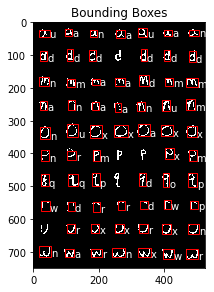

In [51]:
folder_directory = '/Users/sanchitthakur/test_images'
imgs = Path(folder_directory).glob('test1.bmp')
for img in imgs:
  im=io.imread(img)
  img_binary = (im < th).astype(np.double)
  img_label = label(img_binary, background=0)
  regions = regionprops(img_label)
  io.imshow(img_binary)
  ax = plt.gca()
  bound_count = 0
  for props in regions:
      minr, minc, maxr, maxc = props.bbox
      if ((maxc-minc) < 19 or (maxr-minr) < 19):
        continue
      ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = 
  False, edgecolor = 'red', linewidth = 1))
      ax.text(maxc, maxr, knn_predict_test1[bound_count], color="white")
      bound_count += 1
  ax.set_title('Bounding Boxes')
io.show()

In [52]:
knn.score(testing_dataframe1,y_test)

0.3582089552238806

FOR TEST IMAGE 2

In [53]:
testing_dataframe2 = pd.DataFrame(Features_last, columns = ['Hu-1', 'Hu-2', 'Hu-3', 'Hu-4', 'Hu-5', 'Hu-6', 'Hu-7'])
print(testing_dataframe2)

        Hu-1       Hu-2        Hu-3        Hu-4          Hu-5        Hu-6  \
0   3.656729   8.150940   49.570150   69.882510   4041.614518  199.329833   
1   4.801529  15.866954  116.769303  161.132320  21944.024570  639.413980   
2   4.028151  11.168978   76.536418  101.183475   8838.969233  337.653680   
3   4.651750  16.240519  117.137025  148.244447  19470.497549  596.444079   
4   4.259420  12.876470   91.842166  118.280918  12260.027672  423.595420   
..       ...        ...         ...         ...           ...         ...   
68  0.594302   0.027606    0.008724    0.002684     -0.000004   -0.000412   
69  0.629526   0.058187    0.020365    0.075668      0.001550    0.017433   
70  0.434798   0.013887    0.001485    0.008365     -0.000001    0.000954   
71  0.541101   0.023267    0.010171    0.011822      0.000124    0.001723   
72  0.428178   0.000051    0.007886    0.024160     -0.000322   -0.000155   

           Hu-7  
0    763.180513  
1   2640.720123  
2   1076.427532  
3  

In [54]:
y_test_2 = pd.DataFrame(y_true_last)
print(y_test_2)

    0
0   f
1   f
2   f
3   f
4   f
.. ..
68  m
69  m
70  m
71  m
72  m

[73 rows x 1 columns]


In [55]:
knn_predict_test2 = knn.predict(testing_dataframe2)
knn_predict_test2

array(['h', 'f', 'h', 'f', 'h', 'h', 'f', 'f', 'h', 'h', 'h', 'h', 'h',
       'h', 'f', 'h', 'k', 'f', 'k', 'h', 'f', 'h', 'k', 'f', 'k', 'f',
       'o', 'x', 'o', 'q', 'x', 'o', 'o', 'x', 'p', 'f', 'x', 'z', 'z',
       'q', 'x', 'z', 'd', 'n', 'd', 'n', 'a', 'x', 'x', 'a', 'o', 'o',
       'o', 'o', 'x', 'o', 'o', 'a', 'a', 'm', 'z', 'x', 'w', 'n', 'n',
       'n', 'n', 'n', 'n', 'a', 'u', 'n', 'a'], dtype=object)

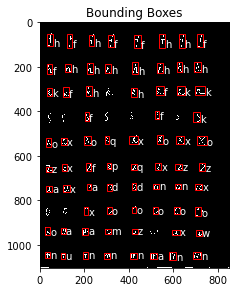

In [56]:
folder_directory = '/Users/sanchitthakur/test_images'
imgs = Path(folder_directory).glob('test2.bmp')
for img in imgs:
  im=io.imread(img)
  img_binary = (im < th).astype(np.double)
  img_label = label(img_binary, background=0)
  regions = regionprops(img_label)
  io.imshow(img_binary)
  ax = plt.gca()
  bound_count = 0
  for props in regions:
      minr, minc, maxr, maxc = props.bbox
      if ((maxc-minc) < 19 or (maxr-minr) < 19):
        continue
      ax. add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = 
  False, edgecolor = 'red', linewidth = 1))
      ax.text(maxc, maxr, knn_predict_test2[bound_count], color="white")
      bound_count += 1
  ax.set_title('Bounding Boxes')
io.show()

In [57]:
knn.score(testing_dataframe2,y_test_2)

0.3972602739726027